In [1]:
import scanpy as sc
from os.path import join

In [2]:
n_cells_per_batch = 200
p = join('/storage/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration',
         'data/integration_march_2021/input/input_%i_cells.h5ad' % n_cells_per_batch)
ad = sc.read(p)

In [3]:
ad.layers['counts'].max(), ad.X.max()

(1358.0, 9.230017)

In [4]:
sc.pp.neighbors(ad)
sc.tl.umap(ad)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [5]:
sc.set_figure_params(facecolor='white')

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [10, 5]
rcParams['figure.dpi'] = 110

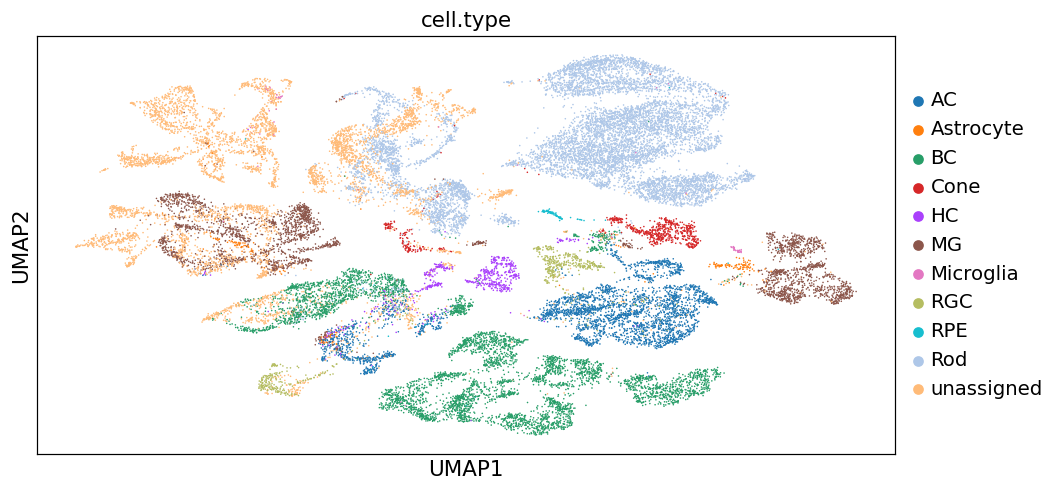

In [7]:
sc.pl.umap(ad, color='cell.type')

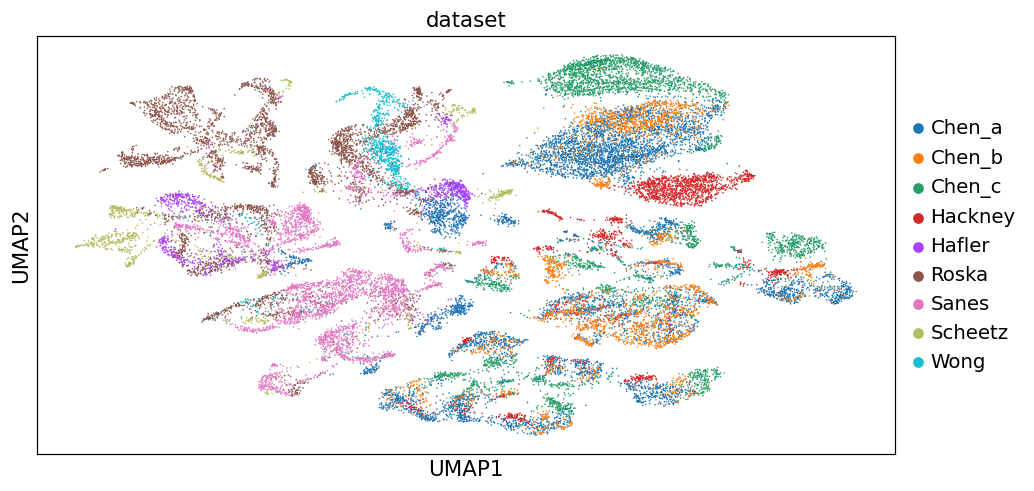

In [8]:
sc.pl.umap(ad, color='dataset')

In [11]:
# ad = ad[:,ad.X.max(axis=0) > 0]

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [12]:
import scipy

In [116]:
# type(scipy.sparse.csr_matrix(ad.X)), type(ad.X)
# ad.X = scipy.sparse.csr_matrix(ad.X)

(scipy.sparse.csr.csr_matrix, anndata._core.views.SparseCSRView)

In [115]:
type(ad.X)

anndata._core.views.SparseCSRView

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [371]:
ad.var['mean_counts'] = np.array(ad.layers['counts'].mean(axis=0)).flatten()
ad.var['min_counts'] = np.array(ad.layers['counts'].min(axis=0).toarray()).flatten()
ad.var['max_counts'] = np.array(ad.layers['counts'].max(axis=0).toarray()).flatten()

In [189]:
import matplotlib.pyplot as plt

(43022, 15479)

In [241]:
nCount_RNA_thr = 800
ad = ad[ad.obs['nCount_RNA'] > nCount_RNA_thr,:]

Text(0.5, 0, '# counts per cell')

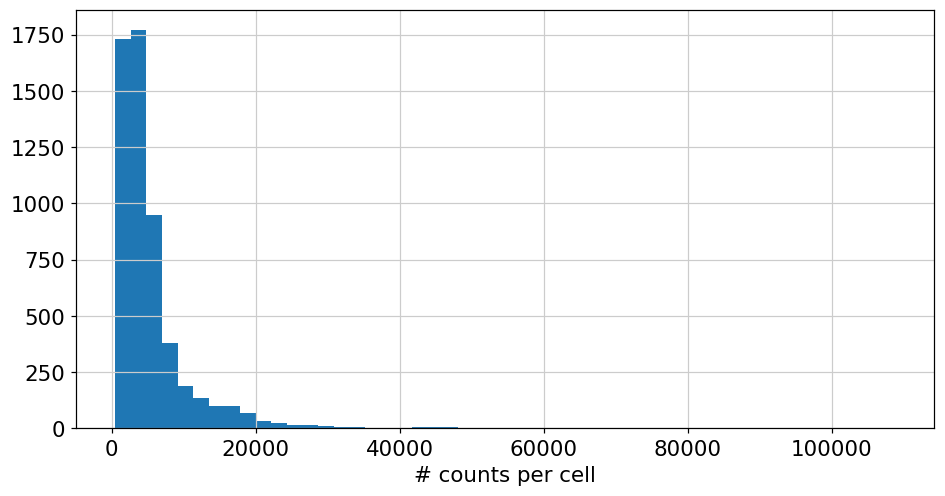

In [372]:
plt.hist(ad.obs['nCount_RNA'], bins=50)
plt.xlabel('# counts per cell')

SyntaxError: invalid syntax (<ipython-input-293-4967141b57cb>, line 1)

(39159, 10294)
(39159, 10278)


In [ ]:
ad.shape

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [228]:
import scipy

In [229]:
ad.X = scipy.sparse.csr_matrix(ad.X)

In [181]:
ad.X.min()

<43022x15479 sparse matrix of type '<class 'numpy.float32'>'
	with 69609868 stored elements in Compressed Sparse Row format>

In [306]:
ad.shape

(39159, 8647)

In [254]:
ad.obs_names.value_counts()

CTCTACGGTGTCCTCT-1-9:Sanes:9         1
CACTGAAGTCGATTCA-1-19:Chen_c:19      1
GGGTAGATCGTGGCGT-1-11:Chen_b:11      1
CELL3898306-2:Hackney:2              1
TTCTCCTCAAGAGTCG-1_1-15:Roska:15     1
                                    ..
ATGCCTCGTATCAAGA-1_2-20:Chen_a:20    1
TTCTTAGAGCATGGCA-1_3-22:Roska:22     1
CACGGGTTCTCCGCAT-1-13:Chen_c:13      1
GACTTCCTCTTCCCAG-1-1:Chen_c:1        1
CATCCGTAGTTCATGC-1_1-5:Chen_a:5      1
Length: 39159, dtype: int64

In [ ]:
ad.X = ad.X.todense()

In [271]:
ad.X.todense()

matrix([[0.       , 3.8948028, 0.       , ..., 7.1331406, 0.       ,
         3.8948028],
        [0.       , 0.       , 0.       , ..., 5.848235 , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 5.587701 , 0.       ,
         3.0666952],
        ...,
        [0.       , 0.       , 0.       , ..., 6.61829  , 0.       ,
         5.2359943],
        [0.       , 0.       , 0.       , ..., 6.1687546, 0.       ,
         5.9011345],
        [0.       , 0.       , 0.       , ..., 6.1802106, 0.       ,
         6.1802106]], dtype=float32)

In [272]:
sc.pp.log1p(ad)

In [273]:
ad.X.todense()

matrix([[0.       , 1.588174 , 0.       , ..., 2.095947 , 0.       ,
         1.588174 ],
        [0.       , 0.       , 0.       , ..., 1.923991 , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 1.8852044, 0.       ,
         1.4028307],
        ...,
        [0.       , 0.       , 0.       , ..., 2.030552 , 0.       ,
         1.830338 ],
        [0.       , 0.       , 0.       , ..., 1.9697319, 0.       ,
         1.9316858],
        [0.       , 0.       , 0.       , ..., 1.9713287, 0.       ,
         1.9713287]], dtype=float32)

In [373]:
ad.obs['dataset'].value_counts()

Chen_c     3000
Scheetz     900
Hafler      898
Wong        750
Name: dataset, dtype: int64

In [267]:
ad.obs.index.value_counts()

CTCTACGGTGTCCTCT-1-9:Sanes:9         1
CACTGAAGTCGATTCA-1-19:Chen_c:19      1
GGGTAGATCGTGGCGT-1-11:Chen_b:11      1
CELL3898306-2:Hackney:2              1
TTCTCCTCAAGAGTCG-1_1-15:Roska:15     1
                                    ..
ATGCCTCGTATCAAGA-1_2-20:Chen_a:20    1
TTCTTAGAGCATGGCA-1_3-22:Roska:22     1
CACGGGTTCTCCGCAT-1-13:Chen_c:13      1
GACTTCCTCTTCCCAG-1-1:Chen_c:1        1
CATCCGTAGTTCATGC-1_1-5:Chen_a:5      1
Length: 39159, dtype: int64

In [322]:
# load sanes as an example
bydataset_directory = '../../data/integration_march_2021/input/bydataset'
n_sample = None # 5000 # None # 5000
nCount_RNA_thr = 800
import random
random.seed(500)
adatas = []
dataset_name = 'Sanes'# ["Wong", "Scheetz", "Chen_c", "Hafler", "Roska", "Chen_a", "Sanes" "Hackney", "Chen_b"]
f = dataset_name + '.h5ad'
print(f)
p = join(bydataset_directory, f)
ad = sc.read(p)

Sanes.h5ad


In [362]:
ad.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,scpred_AC,scpred_Astrocyte,scpred_BC,scpred_Cone,scpred_HC,...,scpred_Microglia,scpred_RGC,scpred_RPE,scpred_Rod,scpred_max,scpred_prediction,percent.mt,dataset,filename,batch
AAACCTGAGACAGGCT-1-0,0,626.0,475,3,3,1.346480e-06,0.000144,0.000086,0.000114,1.000000,...,0.000055,0.000069,0.000056,0.000165,1.000000,HC,7.507987,Sanes,H3CD90S1,0
AAACCTGAGGATTCGG-1-0,0,2386.0,1218,8,8,9.996530e-01,0.000102,0.000275,0.000098,0.000146,...,0.000123,0.000252,0.000094,0.000189,0.999653,AC,4.274937,Sanes,H3CD90S1,0
AAACCTGAGTTGAGTA-1-0,0,5919.0,1845,11,11,1.196346e-05,0.002046,0.000209,0.000111,0.000102,...,0.000163,0.000253,0.000122,0.000036,0.999732,MG,0.810948,Sanes,H3CD90S1,0
AAACCTGCAACGCACC-1-0,0,2068.0,923,1,1,1.118113e-05,1.000000,0.000037,0.000099,0.000255,...,0.000195,0.000153,0.000105,0.000020,1.000000,Astrocyte,0.290135,Sanes,H3CD90S1,0
AAACCTGCAAGTCTAC-1-0,0,5157.0,1898,1,1,7.578960e-06,1.000000,0.000016,0.000118,0.000250,...,0.000169,0.000252,0.000105,0.000009,1.000000,Astrocyte,1.958503,Sanes,H3CD90S1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCACACAAGAAATC-1-18,0,2768.0,1432,0,0,6.382281e-07,0.000020,0.000026,0.000033,0.000018,...,0.000057,0.000083,0.000053,0.999936,0.999936,Rod,9.862717,Sanes,H11FoveaS1,18
TTTCCTCCAGGGTCTC-1-18,0,2313.0,1274,0,0,1.086065e-06,0.000026,0.000052,0.000022,0.000030,...,0.000066,0.000033,0.000050,0.999948,0.999948,Rod,9.597925,Sanes,H11FoveaS1,18
TTTCGATTCGGTAGGA-1-18,0,1380.0,881,1,1,5.519348e-07,0.000017,0.000018,0.000056,0.000027,...,0.000056,0.000145,0.000051,0.999912,0.999912,Rod,7.101449,Sanes,H11FoveaS1,18
TTTGTTGAGGAACATT-1-18,0,2662.0,1369,0,0,2.552872e-07,0.000013,0.000066,0.000023,0.000032,...,0.000058,0.000064,0.000054,0.999969,0.999969,Rod,8.978212,Sanes,H11FoveaS1,18


In [358]:
# print('normalization')
# sc.pp.normalize_per_cell(ad_sel, counts_per_cell_after=1e5)
# sc.pp.log1p(ad_sel)

Trying to set attribute `.obs` of view, copying.


normalization


In [378]:
# using cell_ranger as flavor
sc.pp.highly_variable_genes(ad, flavor='cell_ranger', batch_key='batch.merged') #  batch_key='batch.merged')

In [298]:
## print(ad.shape)
sc.pp.filter_genes(ad, min_cells=2000)
print(ad.shape)

(39159, 8647)


In [ ]:
print('done...')

In [328]:
ad.obs.groupby('batch', as_index=False).apply

In [339]:
ad.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,scpred_AC,scpred_Astrocyte,scpred_BC,scpred_Cone,scpred_HC,...,scpred_Microglia,scpred_RGC,scpred_RPE,scpred_Rod,scpred_max,scpred_prediction,percent.mt,dataset,filename,batch
AAACCTGAGACAGGCT-1-0,0,626.0,475,3,3,1.346480e-06,0.000144,0.000086,0.000114,1.000000,...,0.000055,0.000069,0.000056,0.000165,1.000000,HC,7.507987,Sanes,H3CD90S1,0
AAACCTGAGGATTCGG-1-0,0,2386.0,1218,8,8,9.996530e-01,0.000102,0.000275,0.000098,0.000146,...,0.000123,0.000252,0.000094,0.000189,0.999653,AC,4.274937,Sanes,H3CD90S1,0
AAACCTGAGTTGAGTA-1-0,0,5919.0,1845,11,11,1.196346e-05,0.002046,0.000209,0.000111,0.000102,...,0.000163,0.000253,0.000122,0.000036,0.999732,MG,0.810948,Sanes,H3CD90S1,0
AAACCTGCAACGCACC-1-0,0,2068.0,923,1,1,1.118113e-05,1.000000,0.000037,0.000099,0.000255,...,0.000195,0.000153,0.000105,0.000020,1.000000,Astrocyte,0.290135,Sanes,H3CD90S1,0
AAACCTGCAAGTCTAC-1-0,0,5157.0,1898,1,1,7.578960e-06,1.000000,0.000016,0.000118,0.000250,...,0.000169,0.000252,0.000105,0.000009,1.000000,Astrocyte,1.958503,Sanes,H3CD90S1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCACACAAGAAATC-1-18,0,2768.0,1432,0,0,6.382281e-07,0.000020,0.000026,0.000033,0.000018,...,0.000057,0.000083,0.000053,0.999936,0.999936,Rod,9.862717,Sanes,H11FoveaS1,18
TTTCCTCCAGGGTCTC-1-18,0,2313.0,1274,0,0,1.086065e-06,0.000026,0.000052,0.000022,0.000030,...,0.000066,0.000033,0.000050,0.999948,0.999948,Rod,9.597925,Sanes,H11FoveaS1,18
TTTCGATTCGGTAGGA-1-18,0,1380.0,881,1,1,5.519348e-07,0.000017,0.000018,0.000056,0.000027,...,0.000056,0.000145,0.000051,0.999912,0.999912,Rod,7.101449,Sanes,H11FoveaS1,18
TTTGTTGAGGAACATT-1-18,0,2662.0,1369,0,0,2.552872e-07,0.000013,0.000066,0.000023,0.000032,...,0.000058,0.000064,0.000054,0.999969,0.999969,Rod,8.978212,Sanes,H11FoveaS1,18


0     200
1     200
16    200
15    200
14    200
13    200
12    200
11    200
10    200
9     200
8     200
7     200
6     200
5     200
4     200
3     200
2     200
18    200
17     23
Name: batch, dtype: int64

In [326]:
# select at least 500 cells per batch


ad.obs.batch.value_counts()

13    5535
3     5469
16    5283
6     5282
9     5278
4     5203
8     4991
5     4733
14    4547
0     4369
12    4141
10    3859
7     3730
15    3548
1     3260
11    3093
2     1924
18     757
17      23
Name: batch, dtype: int64

In [320]:
ad_sel = ad[ad.obs['dataset'] == 'Sanes',:]

In [321]:
ad_sel.obs['batch.merged'].value_counts()

130    361
132    351
127    332
129    318
133    312
123    301
120    287
128    280
115    273
119    273
121    272
118    215
117    201
122    195
131    194
116    162
126    102
125     55
124      1
Name: batch.merged, dtype: int64

In [312]:
print('here...')

here...


In [ ]:
ad_sel

In [318]:
ad.obs['batch.merged.k'] = ad.obs['dataset'].astype(str) + '_' + ad.obs['batch.merged'].astype(str)

In [319]:
for dataset in set(ad.obs['batch.merged.k']):
    ad_sel = ad[ad.obs['batch.merged.k'] == dataset,:]
    print(dataset, ad_sel.shape)
    sc.pp.highly_variable_genes(ad_sel, flavor='cell_ranger', batch_key='batch.merged') #  batch_key='batch.merged')

Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical


Chen_a_3 (276, 8647)
Chen_b_50 (397, 8647)
Sanes_119 (273, 8647)


Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical


Chen_c_58 (285, 8647)


Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical


Chen_c_56 (186, 8647)
Sanes_121 (272, 8647)
Scheetz_139 (1009, 8647)


Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch.merged.k' as categorical


Roska_102 (235, 8647)
Hafler_90 (644, 8647)
Sanes_124 (1, 8647)


ZeroDivisionError: division by zero

ValueError: Bin edges must be unique: array([      -inf, 0.46794195, 0.51433172, 0.51433172, 0.53138022,
       0.53138022, 0.596696  , 0.67438579, 0.68594775, 0.83607845,
       0.99932218, 1.11311245, 1.20027947, 1.3040204 , 1.42160572,
       1.67131772, 1.93023896, 2.27733988, 3.06651803, 6.88344622,
              inf]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [289]:
sc.pp.highly_variable_genes(ad, flavor='seurat', batch_key='batch.merged')

ZeroDivisionError: division by zero